# Findings of Products in Sephora

video link: https://drive.google.com/file/d/16M6kaDR696OeYddzx91nv6bcj0sRl4-o/view?usp=sharing (I also uploaded on Canvas - Panopto Video)

dataset source: Kaggle - Sephora Website https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website

presentation slides: https://docs.google.com/presentation/d/1Svitc78v_ov4CgR9BoZBb7ivoAGrqRTc/edit?usp=sharing&ouid=106307621695890170797&rtpof=true&sd=true

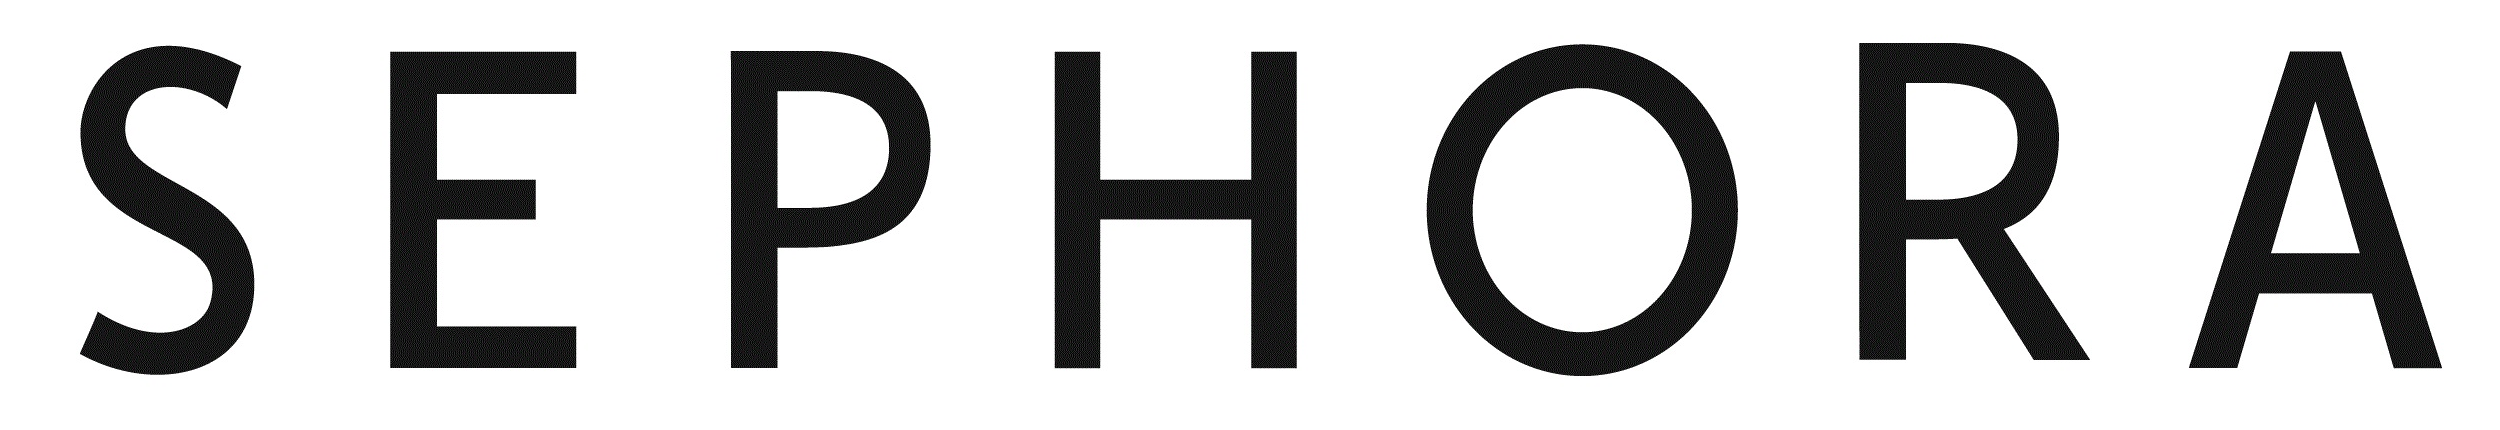

In [213]:
from IPython import display 
display.Image("Sephora_logo.png", width = 500, height = 500)
# Source of Image: Logos Download - https://logos-download.com/wp-content/uploads/2016/02/Sephora_logo.png

## Introduction

Since I had an internship at a cosmetics company before, I was really interested about business in makeup and skincare products.

In my opinion, nowadays the competition among brands in makeup industry are highly competitive, and the reason of a consumer choosing a specific product could be complicated. Most cosmetics companies have advanced technology to produce products, and lots of social media influencers review beauty, skincare, and makeup products on media platforms. When choosing brands, price is not the only factor customers care about. They also consider about other factors such as online ratings and packages of different products. 

Because Sephora is one of the largest beauty retail store in the US, it is suitable to gain insights by analyzing products sold in Sephora, and I believe that it will be useful information for both Sephora and brands to develop product marketing strategies.

From Kaggle, I found a dataset that includes many well-known beauty brands and products available in Sephora: including fragrance, perfume and skincare products etc. The data in the dataset was collected from Sephora website and was last updated 2 years ago.

## Goals and Questions

I would like to know about the following points:

▪  What is the constitution of the dataset?

▪  Which product is more special and difficult to get?

▪  Are there any relationship between loves/ number of review/ rating/ prices...for different products?

Through data wrangling and visualization, we can get information for these questions.

## Data and Preparation

Firstly, I imported the libraries and dataset.

In [214]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# Read the dataset
dfSep = pd.read_csv('sephora_website_dataset.csv', na_values= '?')
dfSep.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [216]:
# There are no missing values in the dataset
dfSep.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

There are no missing values.

## General Information

Secondly, I started to look at some general information that got from this dataset.

In [217]:
# To get the number of rows and columns of dataset
dfSep.shape

(9168, 21)

There are 9168 rows and 21 columns in total.

In [218]:
# List all the columns names in the dataset
print(list(dfSep))

['id', 'brand', 'category', 'name', 'size', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']


These are the names of the 21 columns.

In [219]:
# Get the count of products in each product category
dfSep.category.value_counts().head()

Perfume                  665
Moisturizers             451
Face Serums              384
Value & Gift Sets        378
Face Wash & Cleansers    247
Name: category, dtype: int64

Perfume, moisturizers, and face serums products have the highest number in this dataset.

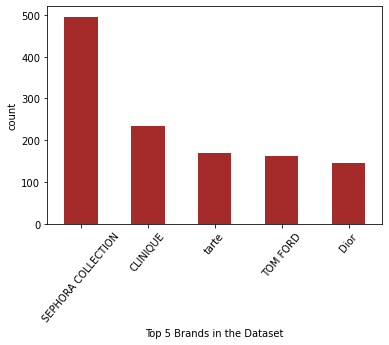

In [247]:
# Product counts based on brand names
onlyy = dfSep.brand.value_counts().head()
onlyy.plot.bar(xlabel = 'Top 5 Brands in the Dataset', ylabel= 'count', figsize = (6,4), rot = 50
                          , color = 'brown');

There are most Sephora Collection products in the dataset. It means that Sephora Collection has the largest number of products sold in Sephora.

## Analysis for Categories

After interpreting the general data, I start to analyze data of cloumns and rows and their relationships.

### Special Products

In [221]:
# Select products that are only available online and limited edition
dfSep[(dfSep.online_only == 1) & (dfSep.limited_edition == 1)][['brand','name','online_only','limited_edition']].head()

,brand,name,online_only,limited_edition
15,Acqua Di Parma,Blu Mediterraneo Discovery Collection Rollerba...,1,1
20,Acqua Di Parma,Blu Mediterraneo Fico di Amalfi Gift Set,1,1
28,Acqua Di Parma,Peonia Nobile Gift Set,1,1
31,Acqua Di Parma,Blu Mediterraneo Arancia di Capri Gift Set,1,1
32,Acqua Di Parma,Rosa Nobile Gift Set,1,1


I was curious about what brands and products are special: online only and limited edition.

In [222]:
# Count of products that are only available online and limited edition
abc = dfSep[(dfSep.online_only == 1) & (dfSep.limited_edition == 1)]
abc.id.count()

307

There are totally 307 products that are available only online and are also limited edition.

In [224]:
# Top 5 brands that are only available online and limited edition
only = dfSep[(dfSep.online_only == 1) & (dfSep.limited_edition == 1)][['brand','name','online_only','limited_edition']]
only.brand.value_counts().head()

CLINIQUE                   13
DevaCurl                    9
Kitsch                      8
Atelier Cologne             8
FENTY BEAUTY by Rihanna     8
Name: brand, dtype: int64

I found that brands like Clinique, DevaCurl, Kitsch, Atelier Cologne, Fenty Beauty by Rihanna have the most products that are available only online and are limited edition.

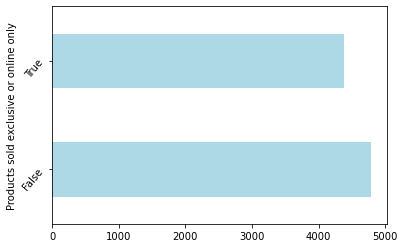

In [246]:
# True: If the product is sold exclusive or sold online only 
exclusiveproducts = dfSep.MarketingFlags.value_counts() 
exclusiveproducts.plot.barh(xlabel = 'Products sold exclusive or online only', ylabel= 'count', figsize = (6,4), rot = 50
                          , color = 'lightblue');

There are more than 4000 products that are available only online or limited edition.

### Important Facts for Products

It is also important for consumers to look at facts about ingredients, usage instructions, and package options while pruchasing products.

In [225]:
# Create a new column called "ingredients_are_unknown". True means the ingredients of the products are unknown, and False means the ingredients are known.
dfSep['ingredients_unknown'] = dfSep.ingredients == 'unknown'
dfSep.ingredients_unknown.value_counts()

False    7538
True     1630
Name: ingredients_unknown, dtype: int64

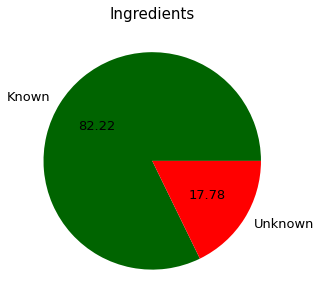

In [226]:
# Create a pie chart to show the ratio of products that have known/ unknown ingredients
dfSep.ingredients_unknown.value_counts().plot.pie(labels=['Known', 'Unknown'], colors=['darkgreen', 'red'],
                 autopct='%.2f', fontsize=13, figsize=(5, 5));
plt.title('Ingredients', fontsize=15)
plt.axis('off');

Many consumers care about whether the ingredients of beauty products are disclosed or not on the package, and they often prefer to buy products with clear ingredients lists on them. The percentage of products that have known ingredients could also be a factor while consumers choosing which store they want to go shopping. If a store sells many beauty products that show their ingredients, consumers will have more willingness to shop inside. Therefore, I created a new column to identify beauty products that have whole ingredients on their packages, and those without ingredients names. The ingredients of 82.22% of the products in Sephora are known, and 17.78% are unknown.

In [227]:
# Create a new column called "howtouse_unknown". True means there are not suggested usage of the products, and False means there are.
dfSep['howtouse_unknown'] = dfSep.how_to_use == 'no instructions'
dfSep.howtouse_unknown.value_counts()

False    7595
True     1573
Name: howtouse_unknown, dtype: int64

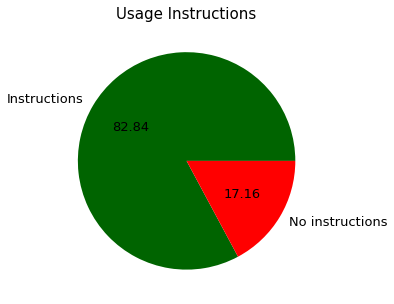

In [228]:
# Create a pie chart to show the ratio of products that have known/ unknown usage
dfSep.howtouse_unknown.value_counts().plot.pie(labels=['Instructions', 'No instructions'], colors=['darkgreen', 'red'],
                 autopct='%.2f', fontsize=13, figsize=(5, 5));
plt.title('Usage Instructions', fontsize=15)
plt.axis('off');

In [229]:
# Create a new column called "options_unknown". True means there are no other options of the products, and False means there are.
dfSep['options_unknown'] = dfSep.options == 'no options'
dfSep.options_unknown.value_counts()

True     8377
False     791
Name: options_unknown, dtype: int64

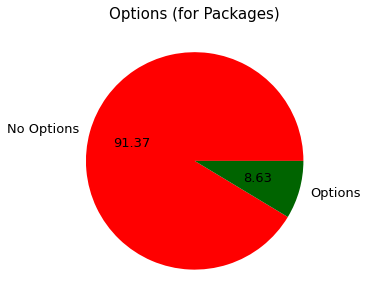

In [230]:
# Create a pie chart to show the ratio of products that have/ have no options
dfSep.options_unknown.value_counts().plot.pie(labels=['No Options', 'Options'], colors=['red', 'darkgreen'],
                 autopct='%.2f', fontsize=13, figsize=(5, 5));
plt.title('Options (for Packages)', fontsize=15)
plt.axis('off');

Similarly, it is also very important for beauty products to show usage instructions and package options. These are pie charts for them. As indicated in the charts, 82.84% of products have instructions, and 17.16% don't have. Most products (91.37%) don't have package options (for example, large/ small size) to purchase, but 8.63% of the products have different options.

### Preferences and Feedback from Consumers

Next, I focused on analyzing the price of products and what kind of feedbacks (loves/ ratings/ reviews) consumers have on them. I also tried to check if there are some connections between these factors.

In [231]:
# Maximum value of column 'rating'
dfSep.rating.max() 

5.0

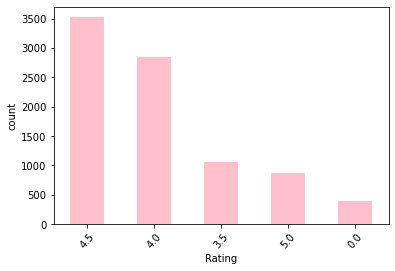

In [232]:
# Count of Rating values (4.5 is the most frequent number)
rating = dfSep.rating.value_counts().head()
rating.plot.bar(xlabel = 'Rating', ylabel= 'count', figsize = (6,4), rot = 50
                          , color = 'pink');

In [233]:
# Maximum value of column 'love'
dfSep.love.max() 

1300000

In [234]:
# Maximum value of column 'number_of_reviews'
dfSep.number_of_reviews.max() 

19000

Here are the maximum values of rating, love, and number of reviews.

In [249]:
# Create a new column called 'love_grouping' that groups 'loves' each product gets
love = dfSep['love']
bins = [-1,10000,100000,1000000,2000000] 
bin_names = ['low', 'medium', 'high', 'very high']

dfSep['love_grouping'] = pd.cut(love,bins,labels=bin_names)
print(dfSep.love.value_counts())
dfSep[['brand','category','name','love','love_grouping']].head()

0         181
1100      126
1500      126
1200      114
1300      112
         ... 
91800       1
209400      1
127900      1
624600      1
445         1
Name: love, Length: 1683, dtype: int64


,brand,category,name,love,love_grouping
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,3002,low
1,Acqua Di Parma,Cologne,Colonia,2700,low
2,Acqua Di Parma,Perfume,Arancia di Capri,2600,low
3,Acqua Di Parma,Perfume,Mirto di Panarea,2900,low
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,943,low


Because the range of 'love' is large, so I grouped them into 4 groups: low, medium, high, very high.

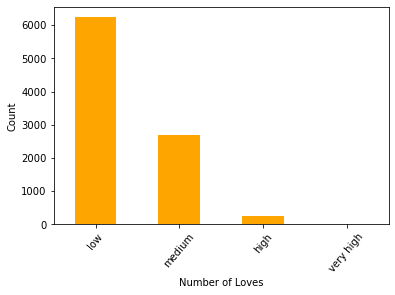

In [236]:
# Showing the number of loves in groups with bar chart
numberofloves = dfSep.love_grouping.value_counts() 
numberofloves.plot.bar(xlabel = 'Number of Loves', ylabel= 'Count', figsize = (6,4), rot = 50, color = 'orange');

Here is a bar chart for the 4 love groups. Most products receive low numbers of loves, which is in the range of 0 to 10000.

In [237]:
# Sort values by price (descending)
dfSep[['brand','category','name','price','online_only','love_grouping']].sort_values(by='price', ascending=0).head()

,brand,category,name,price,online_only,love_grouping
2589,dyson,Hair Straighteners & Flat Irons,Airwrap™ Styler,549.0,0,medium
2590,dyson,Hair Straighteners & Flat Irons,Corrale™ Hair Straightener,499.0,1,medium
6427,Perricone MD,Face Serums,Neuropeptide Smoothing Facial Conformer,495.0,1,low
3396,Guerlain,Face Serums,Orchidée Impériale The Cream,460.0,1,low
8071,Tata Harper,Face Serums,Elixir Vitae Serum Wrinkle Solution,450.0,1,low


I sorted price from the highest and the most expensive product is Dyson-Airwrap Styler. Among the top 5 expensive products, most of them are available only online, and the number of loves they receive are relatively low (love_grouping: medium/ low)

In [238]:
# Sort values by price (ascending)
dfSep[['brand','category','name','price']].sort_values(by='price', ascending=1).head()

,brand,category,name,price
5245,MAKE UP FOR EVER,Makeup Palettes,Artist Color Refillable Makeup Palette,2.0
9160,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,2.0
8985,SEPHORA COLLECTION,Face Masks,Nose Strip,3.0
7113,SEPHORA COLLECTION,Face Wipes,Mini Cleansing Wipes - Watermelon - Hydrating,3.0
9037,SEPHORA COLLECTION,Face Masks,Charcoal Nose Strip,3.0


I also looked at the type of products that have lower prices, and I sorted price from the lowest. The outcome is: Daily frequently used skincare products such as face masks and face wipes have lower prices.

In [239]:
# Sort values by love (descending)
dfSep[['brand','category','name','ingredients','love','rating']].sort_values(by='love', ascending=0).head()

,brand,category,name,ingredients,love,rating
4602,KVD Vegan Beauty,Lipstick,Everlasting Liquid Lipstick,Isododecane- Caprylic/Capric Triglyceride- Dis...,1300000,4.5
5837,NARS,Concealer,Radiant Creamy Concealer,Water/Aqua/Eau- Dimethicone- Hydrogenated Poly...,770700,4.5
272,Anastasia Beverly Hills,Eyebrow,Brow Wiz,\n-Vitamin E: Helps skin fight damage caus...,660000,4.5
4952,Laura Mercier,Setting Spray & Powder,Translucent Loose Setting Powder,Talc- Magnesium Myristate- Nylon-12- Caprylic/...,657100,4.5
5842,NARS,Blush,Blush,Talc- Zinc Stearate- Octyldodecyl Stearate- Oc...,646600,4.5


Apart from price, I also sorted love in descending order. The outcome is: The top 5 products that have the highest  loves are all makeup products, and they all have relatively high ratings, which is 4.5.

In [240]:
# Calculate the correlation between love and rating
dfSep.love.corr(dfSep.rating)

0.09478837550767472

Love and rating are positively correlated.

In [241]:
# Calculate the average price, loves, and rating for each category
category = dfSep.groupby('category')[['love','rating']].mean().sort_values('rating', ascending=0)
category.head()

,love,rating
category,,
Lid Shadow Brush,4600.000000,5.000000
Cologne,2712.898734,4.553797
Aftershave,3142.384615,4.538462
High Tech Tools,3900.000000,4.500000
Powder Brush,5100.000000,4.500000


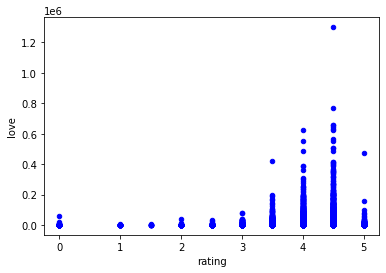

In [242]:
# Create a scatter plot showing the distribution of loves under eaching rating number
dfSep.plot.scatter(x='rating', y='love', color = 'blue');

From the 2 charts above, we can know that products with higher rating numbers (3-5) tend to be more likely to gain higher numbers of loves.

In [243]:
# Sort values by number_of_reviews (descending)
dfSep[['brand','category','name','number_of_reviews','love_grouping']].sort_values(by='number_of_reviews', ascending=0).head()

,brand,category,name,number_of_reviews,love_grouping
519,bareMinerals,Foundation,Original Loose Powder Mineral Foundation Broad...,19000,high
5842,NARS,Blush,Blush,17000,high
4600,KVD Vegan Beauty,Eyeliner,Tattoo Eyeliner,17000,high
8343,Too Faced,Mascara,Better Than Sex Mascara,15000,high
2821,FENTY BEAUTY by Rihanna,Foundation,Pro Filt'r Soft Matte Longwear Foundation,15000,high


The top 5 products that have highest number of reviews are all makeup products. Also, all of them have a lot of loves (love grouping: high).

In [244]:
# Calculate the correlation between price and value_price
dfSep.price.corr(dfSep.value_price)

0.9833567071169981

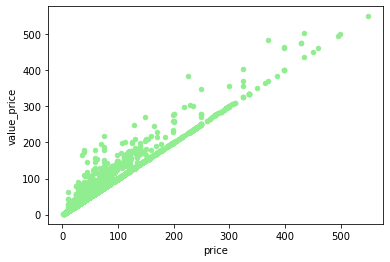

In [245]:
# Showing the relationship between value price and price with scatter plot
dfSep.plot.scatter(x="price", y="value_price", color = 'lightgreen');

Next, I look at the relationship between price (the price of the product) and value_price (the value price of the product for discounted products). They are highly positively correlated (correlation=0.983). The distribution is very close to a line, and sometimes under a certain price, the value of the product is even higher. It means that consumers get more value than what they actually paid for the product.

## Summary

Sephora Collection products take the largest ratio of products sold in Sephora. Nearly a half of the products are available only online or limited edition, and I believe this is a feature of Sephora's marketing strategy. Also, the most expensive products are mainly available only online. Most products in Sephora have ingredients and usage instructions on their packages, but only a few products offer different package options. The higher the rating of a product is, the more likely that it has more loves, and products that have a lot of number of reviews also have a lot of loves.